In [1]:
!pip install tensorflow opencv-python mediapipe matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
import time

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [3]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
#Webcam Capture
cap = cv2.VideoCapture(0)
#setting mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #reading form webcam
    while cap.isOpened():
            #reading feed
            ret, frame = cap.read()
            if not ret:
                break 
    
            #make detections
            image,results = mediapipe_detection(frame,holistic)
            # print(results)
            draw_landmarks(image,results)
            
                
            #showing us the live feed 
            cv2.imshow("camera feed", image)
        
            #break loop if we press q
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    #destroying all the windows 
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cap.release()


I0000 00:00:1706976909.229149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [7]:
draw_landmarks(frame,results)

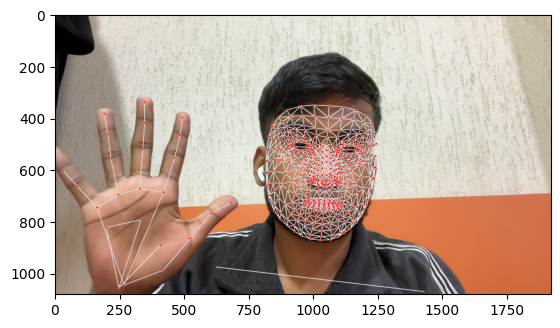

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
### Extracting Keypoints Values

In [46]:
len(results.pose_landmarks.landmark)

33

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose

[array([ 0.55415624,  0.56973422, -0.87298775,  0.99990171]),
 array([ 0.57506484,  0.48425242, -0.81158549,  0.99986482]),
 array([ 0.58804697,  0.48431227, -0.81171906,  0.99983484]),
 array([ 0.60330653,  0.48446384, -0.81208426,  0.99983042]),
 array([ 0.52259076,  0.47928625, -0.80042773,  0.99987006]),
 array([ 0.50216699,  0.47555181, -0.79997087,  0.9998737 ]),
 array([ 0.48300216,  0.47405145, -0.80012089,  0.9998883 ]),
 array([ 0.61957568,  0.52454239, -0.40496394,  0.99984193]),
 array([ 0.44602019,  0.52097863, -0.34448972,  0.99990475]),
 array([ 0.57640719,  0.66100651, -0.72223496,  0.99988902]),
 array([ 0.51000017,  0.65945131, -0.7080096 ,  0.99987948]),
 array([ 0.74142867,  0.99096817, -0.18692113,  0.99781317]),
 array([ 0.32700643,  0.90441984, -0.23238593,  0.9992457 ]),
 array([ 0.82635522,  1.51671433, -0.2323982 ,  0.12115813]),
 array([ 0.12763864,  1.27577567, -0.90253621,  0.89901161]),
 array([ 0.82002366,  1.90068674, -0.50877124,  0.11116155]),
 array([

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [14]:
np.save('0',result_test)

In [49]:
### Setting folders for collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# some example actions
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [10]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [60]:
### Collecting keypoints VAlues for training and testing the model
# we will create 30 example set for each actions 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if not ret:
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()

I0000 00:00:1706969532.085815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [14]:
### PREPROCESSING DATA AND AND CREATING LABEL AND FEATURES

In [17]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 3.8 MB/s eta 0:00:0000:0100:01


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
actions = np.array(['hello', 'thanks', 'iloveyou'])
# Thirty videos
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [15]:
label_map = {label:num for num, label in enumerate(actions)}

In [16]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
sequences

[[array([ 0.56467217,  0.61390793, -0.93517047, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.57084471,  0.59509701, -0.82046717, ...,  0.14059302,
          0.39835101, -0.02991843]),
  array([ 0.57404017,  0.56676394, -0.74444073, ...,  0.15117726,
          0.38039237, -0.01966017]),
  array([ 0.57790583,  0.5620386 , -0.7279107 , ...,  0.15138459,
          0.37980667, -0.00850313]),
  array([ 0.57947767,  0.5549438 , -0.75876373, ...,  0.15115672,
          0.38205242, -0.00551488]),
  array([ 0.57940829,  0.54891843, -0.74556983, ...,  0.15168768,
          0.3820039 , -0.00446069]),
  array([ 0.5809387 ,  0.5393126 , -0.74236906, ...,  0.15267129,
          0.38279217, -0.00890193]),
  array([ 0.5828476 ,  0.53571409, -0.74590576, ...,  0.15610826,
          0.38321722, -0.01014026]),
  array([ 0.58304268,  0.53430378, -0.72301406, ...,  0.15713003,
          0.38061208, -0.00717115]),
  array([ 0.58376569,  0.53476453, -0.71127248, ...,  0.15703368,
       

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
X = np.array(sequences)

In [25]:
X.shape

(90, 30, 1662)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
y.shape

(90, 3)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(5, 3)

In [44]:
### Building and training LSTM Neural Network

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard #tensorboard used to monitor neural network training

In [31]:
# creates logs that helps to monitor neural network training
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [65]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [66]:
res = [.7, 0.2, 0.1]

In [67]:
actions[np.argmax(res)]

'hello'

In [90]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [91]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 1s 26ms/step - loss: 25.0761 - categorical_accuracy: 0.4588
Epoch 2/2000
3/3 [==============================] - 0s 28ms/step - loss: 24.2730 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 29ms/step - loss: 8.0505 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 28ms/step - loss: 7.8415 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 28ms/step - loss: 20.6632 - categorical_accuracy: 0.3059
Epoch 6/2000
3/3 [==============================] - 0s 30ms/step - loss: 21.9272 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 33ms/step - loss: 12.2415 - categorical_accuracy: 0.4588
Epoch 8/2000
3/3 [==============================] - 0s 32ms/step - loss: 11.4496 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 32ms/step - loss: 4.1975 - categorical_accuracy: 0.

KeyboardInterrupt: 

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [92]:
res = model.predict(X_test)

1/1 [==============================] - 0s 178ms/step


In [97]:
actions[np.argmax(res[3])]

'iloveyou'

In [96]:
actions[np.argmax(y_test[3])]

'iloveyou'

In [98]:
model.save('actionnew.keras')

In [ ]:
# model.load_weights('actionnew.keras')

In [95]:
### Evaluation

In [99]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [100]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 11ms/step


In [101]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [102]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[58,  0],
        [ 0, 27]],

       [[55,  0],
        [ 0, 30]],

       [[57,  0],
        [ 0, 28]]])

In [103]:
accuracy_score(ytrue, yhat)

1.0

In [1]:
###real time detection

In [104]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [105]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.waitkey(1)
    cv2.destroyAllWindows()

I0000 00:00:1706978219.036113       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

AttributeError: module 'cv2' has no attribute 'waitkey'